In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

In [2]:
ds = pd.read_csv('bdata_dummies.csv')

In [3]:
ds

,book_authors,book_title,book_desc,book_rating,book_rating_count,book_review_count,genres,anger,fear,happiness,sadness,surprise,emotion_index,16th Century,18th Century,19th Century,20th Century,21st Century,Abandoned,Abuse,Academic,Action,Adoption,Adult,Adult Fiction,Adventure,Africa,African American,African American Literature,Aliens,Alternate History,Amazon,American,American Civil War,American History,American Revolution,Americana,Amish,Ancient,Ancient History,...,Transgender,Travel,True Crime,True Story,Tudor Period,Turkish,Turkish Literature,Ukraine,Unfinished,Urban,Urban Fantasy,Vampires,Vegan,Vegetarian,Vegetarianism,Victorian,Video Games,War,Warfare,Weird Fiction,Werewolves,Western Africa,Western Romance,Westerns,Wildlife,Witchcraft,Witches,Wolves,Womens,Womens Fiction,World History,World War I,World War II,Writing,Young Adult,Young Adult Contemporary,Young Adult Fantasy,Young Adult Paranormal,Young Adult Romance,Zombies
0,Suzanne Collins,The Hunger Games,Winning will make you famous. Losing means cer...,4.33,5519135,160706,Young Adult|Fiction|Science Fiction|Dystopia|F...,0.07,0.48,0.07,0.30,0.07,0.198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,J.K. Rowling,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,4.48,2041594,33264,Fantasy|Young Adult|Fiction,0.04,0.59,0.07,0.11,0.19,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Harper Lee,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,4.27,3745197,79450,Classics|Fiction|Historical|Historical Fiction...,0.00,0.30,0.11,0.30,0.30,0.202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Stephenie Meyer,Twilight,About three things I was absolutely positive.F...,3.58,4281268,97991,Young Adult|Fantasy|Romance|Paranormal|Vampire...,0.10,0.20,0.20,0.20,0.30,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Markus Zusak,The Book Thief,Trying to make sense of the horrors of World W...,4.36,1485632,100821,Historical|Historical Fiction|Fiction|Young Adult,0.12,0.12,0.00,0.12,0.62,0.196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,Steve Kluger,My Most Excellent Year,Dear Anthony:I appreciate your recent interest...,4.04,7279,1072,Young Adult|Fiction|Romance|Lgbt|Contemporary|...,0.08,0.23,0.38,0.08,0.23,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4747,Kimberly Derting,Desires of the Dead,The missing dead call to Violet. They want to ...,4.06,22320,1605,Mystery|Romance|Fantasy|Young Adult|Fantasy|Su...,0.00,0.45,0.07,0.24,0.24,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4748,Eva Ibbotson,The Dragonfly Pool,Tally Hamilton is furious to hear she is being...,4.00,3799,418,Historical|Historical Fiction|Young Adult|Chil...,0.04,0.46,0.19,0.19,0.12,0.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4749,Fábio Moon,Daytripper,What are the most important days of your life?...,4.30,21965,2029,Sequential Art|Graphic Novels|Sequential Art|C...,0.03,0.32,0

In [4]:
ratings = ds['book_rating']
anger = ds['anger']
fear = ds['fear']
happiness = ds['happiness']
sadness = ds['sadness']
surprise = ds['surprise']

In [5]:
corr, _ = pearsonr(ratings, anger)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.049


In [6]:
cols = ds.columns
columns = cols.drop(labels=['book_title', 'book_authors', 'book_desc', 'book_title', 'genres', 'emotion_index'])

In [13]:
X = ds[['book_rating', 'anger', 'fear', 'happiness', 'sadness', 'surprise']]
X

,book_rating,anger,fear,happiness,sadness,surprise
0,4.33,0.07,0.48,0.07,0.30,0.07
1,4.48,0.04,0.59,0.07,0.11,0.19
2,4.27,0.00,0.30,0.11,0.30,0.30
3,3.58,0.10,0.20,0.20,0.20,0.30
4,4.36,0.12,0.12,0.00,0.12,0.62
...,...,...,...,...,...,...
4746,4.04,0.08,0.23,0.38,0.08,0.23
4747,4.06,0.00,0.45,0.07,0.24,0.24
4748,4.00,0.04,0.46,0.19,0.19,0.12
4749,4.30,0.03,0.32,0.26,0.11,0.29


In [14]:
pearsoncorr = X.corr(method='pearson')
pearsoncorr

,book_rating,anger,fear,happiness,sadness,surprise
book_rating,1.000000,0.049297,0.017239,-0.025420,-0.019963,-0.008674
anger,0.049297,1.000000,-0.209054,-0.122080,-0.109402,-0.112831
fear,0.017239,-0.209054,1.000000,-0.349115,-0.398849,-0.410899
happiness,-0.025420,-0.122080,-0.349115,1.000000,-0.171040,-0.207176
sadness,-0.019963,-0.109402,-0.398849,-0.171040,1.000000,-0.262905
surprise,-0.008674,-0.112831,-0.410899,-0.207176,-0.262905,1.000000


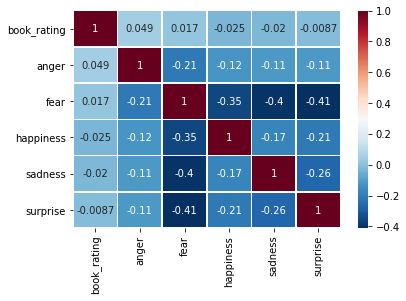

In [15]:
import seaborn as sb

sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)